In [1]:
%pip install ipykernel numpy pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# Дані
# Підготовчий етап

In [2]:
import numpy as np
import pandas as pd

from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def plot_confusion_matrix(confusion_matrix):
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

def print_accuracy(y_test, y_pred, name="Model"):
    print("-"*60, f"{name}\n", sep='\n')
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    plot_confusion_matrix(confusion_matrix(y_test, y_pred))

Перші 5 рядків:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


------------------------------------------------------------
Інформація про дані:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


None

------------------------------------------------------------
Описова статистика:


,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


------------------------------------------------------------
Пропуски в даних:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


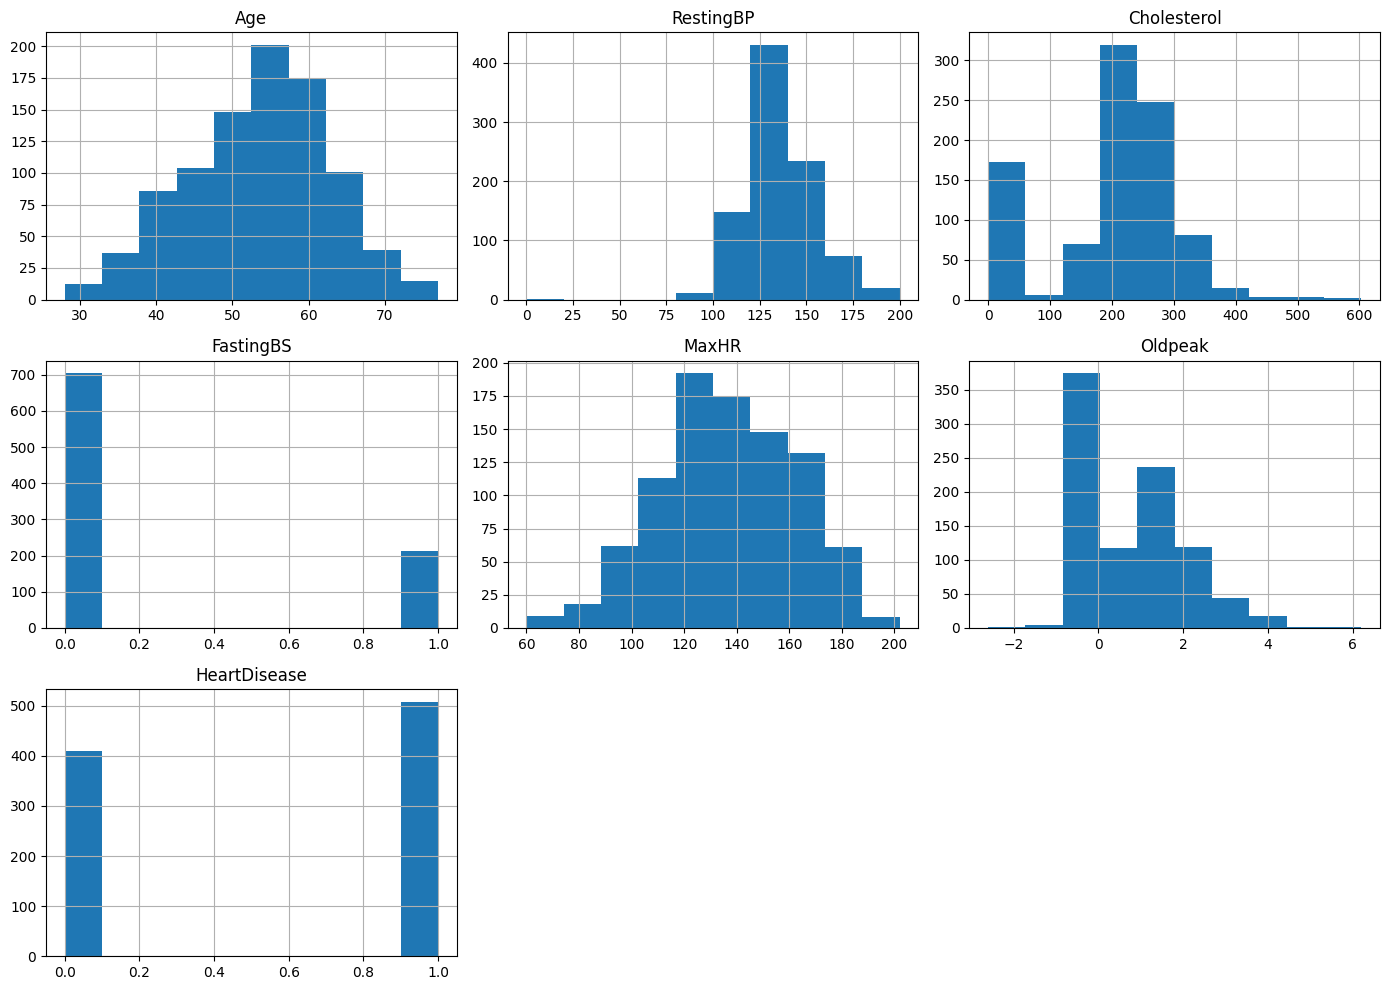

In [4]:
filename = '../Lab2/data/heart.csv'
data = pd.read_csv(filename)

print("Перші 5 рядків:")
display(data.head())

print("-"*60, "Інформація про дані:", sep='\n')
display(data.info())

print("-"*60, "Описова статистика:", sep='\n')
display(data.describe().T)

print("-"*60, "Пропуски в даних:", sep='\n')
print(data.isnull().sum())

data.hist(figsize=(14,10))
plt.tight_layout()
plt.show()

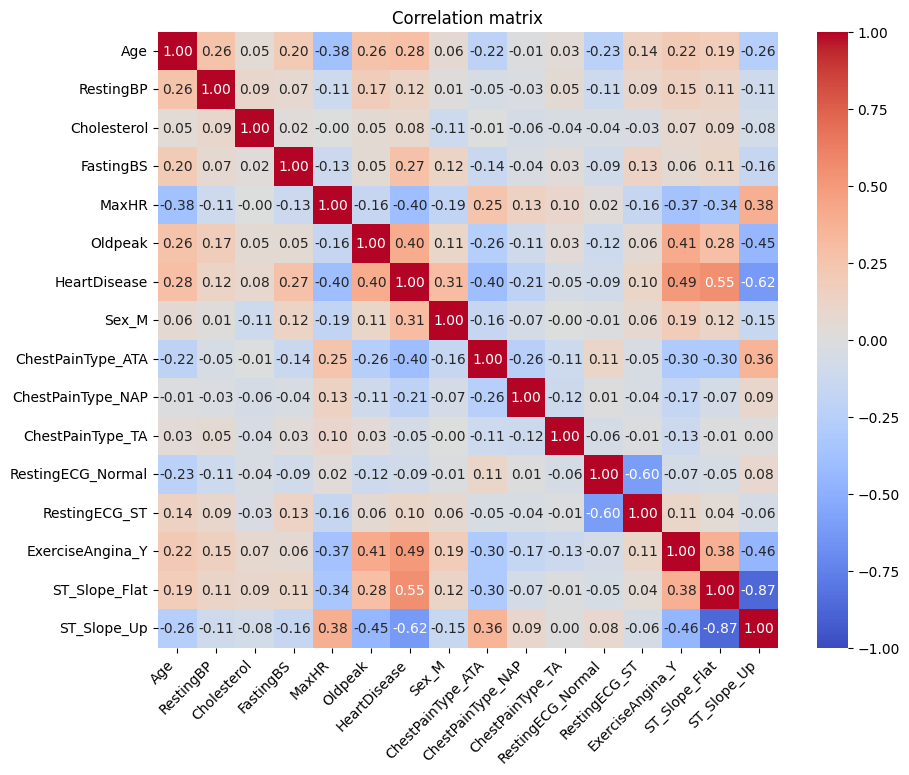

In [5]:
chol_median = data.loc[data["Cholesterol"] > 0, "Cholesterol"].median()
data.loc[data["Cholesterol"] == 0, "Cholesterol"] = chol_median

rest_median = data.loc[data["RestingBP"] > 0, "RestingBP"].median()
data.loc[data["RestingBP"] == 0, "RestingBP"] = rest_median

data_ = pd.get_dummies(data, drop_first=True)  # one-hot encoding

corr = data_.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(rotation=45, ha='right')
plt.title('Correlation matrix')
plt.show()

In [6]:
X = data_.drop('HeartDisease', axis=1).to_numpy(dtype=float)
y = data_.HeartDisease.to_numpy(dtype=int)[:, None]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Реалізація класифікатору

Реалізувати навчання дерева прийняття рішень (Decision Tree) та лісу дерев (Random Forest)


In [ ]:
class DecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def gini(self, y):
        _, counts = np.unique(y, return_counts=True)
        p = counts / len(y)
        return 1 - np.sum(p**2)

    def best_split(self, X, y):
        best_feature = None
        best_threshold = None
        best_gini = 1.0
        samples, features = X.shape

        for feature in range(features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_index = X[:, feature] <= threshold
                right_index = ~left_index

                if left_index.sum() == 0 or right_index.sum() == 0:
                    continue

                g_left = self.gini(y[left_index])
                g_right = self.gini(y[right_index])
                gini = (left_index.sum() * g_left + right_index.sum() * g_right) / samples

                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def build_tree(self, X, y, depth):
        if (self.max_depth is not None and depth >= self.max_depth) or len(y) < self.min_samples_split or len(np.unique(y)) == 1:
            return {"leaf": True, "class": np.bincount(y).argmax()}

        feature, threshold = self.best_split(X, y)

        if feature is None:
            return {"leaf": True, "class": np.bincount(y).argmax()}

        left_index = X[:, feature] <= threshold
        right_index = X[:, feature] > threshold

        return {
            "leaf": False,
            "feature": feature,
            "threshold": threshold,
            "left": self.build_tree(X[left_index], y[left_index], depth + 1),
            "right": self.build_tree(X[right_index], y[right_index], depth + 1),
        }

    def fit(self, X, y):
        self.tree = self.build_tree(X, y, depth=0)

    def predict_one(self, x, node):
        if node["leaf"]:
            return node["class"]
        if x[node["feature"]] <= node["threshold"]:
            return self.predict_one(x, node["left"])
        else:
            return self.predict_one(x, node["right"])

    def predict(self, X):
        return np.array([self.predict_one(x, self.tree) for x in X])

In [ ]:
class RandomForest:
    def __init__(self, n_estimators=10, max_depth=None, min_samples_split=2):
        self.n_estimators = n_estimators
        self.trees = []
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split

    def bootstrap_sample(self, X, y):
        length = len(X)
        index = np.random.choice(length, length, replace=True)
        return X[index], y[index]

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_estimators):
            X_sample, y_sample = self.bootstrap_sample(X, y)
            tree = DecisionTree(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        all_preds = []
        for tree in self.trees:
            preds = tree.predict(X)
            all_preds.append(preds)

        all_preds = np.array(all_preds).T
        final = [Counter(row).most_common(1)[0][0] for row in all_preds]
        return np.array(final)


------------------------------------------------------------
[SELF DECISION TREE]

Accuracy: 0.8061

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       205
           1       0.85      0.80      0.82       254

    accuracy                           0.81       459
   macro avg       0.80      0.81      0.81       459
weighted avg       0.81      0.81      0.81       459



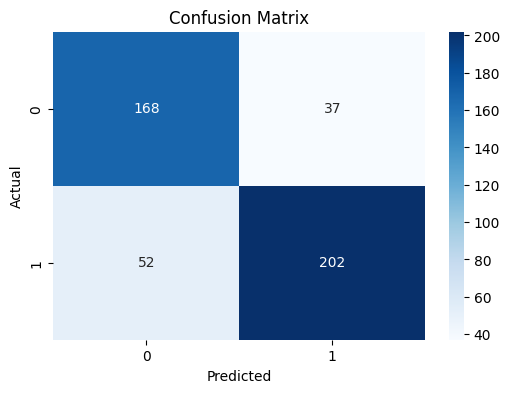

------------------------------------------------------------
[SELF RANDOM FOREST]

Accuracy: 0.8519

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       205
           1       0.87      0.87      0.87       254

    accuracy                           0.85       459
   macro avg       0.85      0.85      0.85       459
weighted avg       0.85      0.85      0.85       459



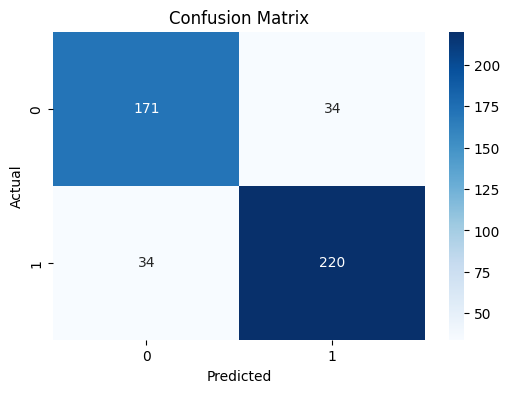

In [9]:
dt_model = DecisionTree(max_depth=5)
dt_model.fit(X_train_scaled, y_train.ravel())
y_pred_dt = dt_model.predict(X_test_scaled)

print_accuracy(y_test, y_pred_dt, name="[SELF DECISION TREE]")

rf_model = RandomForest(n_estimators=100, max_depth=5)
rf_model.fit(X_train_scaled, y_train.ravel())
y_pred_rf = rf_model.predict(X_test_scaled)

print_accuracy(y_test, y_pred_rf, name="[SELF RANDOM FOREST]")

## Test with sklearn

------------------------------------------------------------
[SKLEARN DECISION TREE]

Accuracy: 0.8061

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       205
           1       0.85      0.80      0.82       254

    accuracy                           0.81       459
   macro avg       0.80      0.81      0.81       459
weighted avg       0.81      0.81      0.81       459



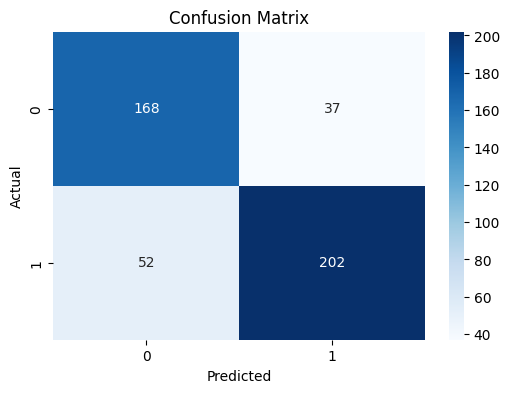

------------------------------------------------------------
[SKLEARN RANDOM FOREST]

Accuracy: 0.8519

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       205
           1       0.87      0.87      0.87       254

    accuracy                           0.85       459
   macro avg       0.85      0.85      0.85       459
weighted avg       0.85      0.85      0.85       459



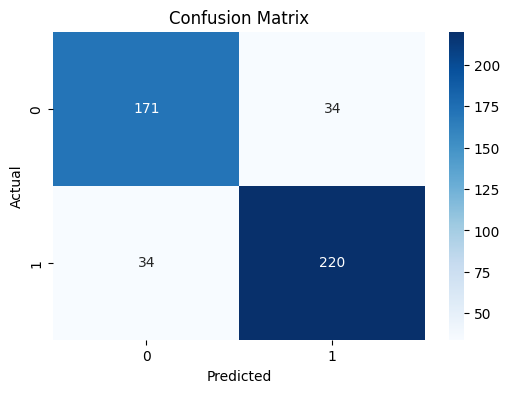

In [ ]:
dt_model_skl = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model_skl.fit(X_train_scaled, y_train.ravel())
y_pred_dt_skl = dt_model.predict(X_test_scaled)

print_accuracy(y_test, y_pred_dt_skl, name="[SKLEARN DECISION TREE]")

rf_model_skl = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model_skl.fit(X_train_scaled, y_train.ravel())
y_pred_rf_skl = rf_model.predict(X_test_scaled)

print_accuracy(y_test, y_pred_rf_skl, name="[SKLEARN RANDOM FOREST]")

# Аналіз результатів

## Результати кореляційного аналізу ознак та класів, ідентифікація взаємопов'язаних факторів

За кореляційною матрицею видно, що деякі ознаки мають сильний зв’язок із наявністю хвороби серця:

- **Позитивна кореляція з HeartDisease**:
  - Oldpeak
  - ST_Slope (Flat, Down, Up)
  - Типи болю в грудях (ChestPainType_*)
  - ExerciseAngina

- **Негативна кореляція**:
  - MaxHR
  - Sex_F (жіноча стать частіше не має захворювання)

Також спостерігається взаємна кореляція між:
- Oldpeak і ST_Slope
- RestingBP та Oldpeak

**Висновок:** ознаки, що описують поведінку серця під навантаженням, є найбільш інформативними.

## Результати пошуку проблем у датасеті (викиди, неповні дані тощо) та способи боротьби з проблемами, що були використані

У датасеті були перевірені основні проблеми:

- **Пропусків немає** - усі стовпці повні.
- **Типи даних коректні**, категоріальні змінені на числові через `one-hot encoding`.
- **Викиди**:
  - Cholesterol = 0, фізіологічно неможливо - це викиди
  - RestingBP = 0, теж неможливо - це викиди

**Використані методи підготовки даних:**

- One-hot encoding для категоріальних ознак  
- Масштабування (`StandardScaler`) для моделей, що потребують нормалізації, однак дерева рішень та Random Forest не залежать від масштабів ознак
- Перевірка пропусків та структури даних
- Для корекції викидів використано медіану, оскільки вона нечутлива до викидів

## Оцінка помилок на начальній та тестовій вибірках:
1. Для дерева прийняття рішень (Decision Tree)
1. Для ансамблю дерев прийняття рішень (Random Forest)


### Decision Tree (max_depth=5)
- Модель не перенавчається надто сильно завдяки обмеженій глибині.
- Accuracy: 0.81 (Але сильно стрибає)
    
**Висновок:** модель проста та інтерпретована, але менш точна і схильна до нестабільності.

### Random Forest (100 дерев, max_depth=5)
- Краща узагальнююча здатність.
- Стабільніші результати:
    - Accuracy: 85
    - Менше помилок завдяки голосуванню багатьох дерев.

**Висновок:** Random Forest працює значно надійніше й точніше за окреме дерево Але довше.

# Контрольні питання
1. Поняття дерева прийняття рішень (Decision Tree)

Дерево рішень - модель, що послідовно розбиває дані за правилами типу *"якщо-то"*.  
Внутрішні вузли - умови, листові вузли - класи.

2. Поняття ансамблю дерев прийняття рішень (Random Forest)

Random Forest - це ансамбль багатьох дерев, кожне з яких:
- навчається на випадковій підмножині даних,
- використовує випадкову підмножину ознак у вузлах.

Підсумкове рішення приймається голосуванням.

3. Поняття чистих даних

Чисті дані - це дані без помилок, пропусків, дублювань, некоректних форматів або шуму.

4. Проблеми у реальних датасетах та способи боротьби з ними

| **Проблема**                  | **Що це означає**                                    | **Приклад**                        | **Як виправити**                                           |
| ----------------------------- | ---------------------------------------------------- | ---------------------------------- | ---------------------------------------------------------- |
| **Пропуски**                  | У даних є порожні або відсутні значення              | `NaN`, `None`                      | Заповнення (mean/median), видалення рядків/стовпців        |
| **Викиди**                    | Значення сильно виходять за нормальний діапазон      | `RestingBP = 0`, `Cholesterol = 0` | Фільтрація, заміна медіаною, трансформації                 |
| **Некоректні типи даних**     | Формат даних не відповідає реальному значенню        | `"45"` як рядок замість числа      | Перетворення типів (`astype`)                              |
| **Категоріальні ознаки**      | Текстові поля, які модель не може опрацювати напряму | `"Male"`, `"ATA"`, `"Yes"`         | One-hot encoding, label encoding                           |
| **Шум та дублікати**          | Повторення рядків або випадкові «сміттєві» дані      | Два однакових пацієнти             | `drop_duplicates()`                                        |
| **Дисбаланс класів**          | Один клас зустрічається значно частіше               | 90% класу 0, 10% класу 1           | Oversampling, undersampling, генерування синтетичних данних|

